### Hackathon for Innomatics Internship

In [100]:
# importing required library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [101]:
# reading the given data
dataF = pd.read_csv("data_2_var.csv")

In [102]:
# displaying data
dataF.head()

,-122.7406674,-130.5720846
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000


In [103]:
dataF.sample(3)

,-122.7406674,-130.5720846
534,80.633331,6.000000
375,56.633331,-35.000000
969,60.458218,-89.164895


In [104]:
dataF.tail(4)

,-122.7406674,-130.5720846
1106,-119.954237,123.609122
1107,-109.942155,127.197394
1108,-111.515368,128.170885
1109,-110.344221,123.087950


In [105]:
# finding the shape of the dataframe
dataF.shape

(1110, 2)

In [106]:
dataF.columns

Index(['-122.7406674', '-130.5720846'], dtype='object')

In [107]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   -122.7406674  1110 non-null   float64
 1   -130.5720846  1110 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB


In [108]:
# the given dataset is having 1110 rows and 2 columns.
# there is no null value in the given dataset.
# the datatype of all column is float64

In [109]:
dataF.describe()

,-122.7406674,-130.5720846
count,1110.000000,1110.000000
mean,6.899714,-26.093318
std,79.324069,69.755980
min,-134.962839,-132.422167
25%,-53.366669,-76.994298
50%,15.739103,-46.036319
75%,76.193907,7.598960
max,134.605775,134.425495


In [110]:
# here mean, min, max standard deviation and quartiles can be observed for both the column of the given dataset

In [111]:
dataF

,-122.7406674,-130.5720846
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000
...,...,...
1105,-115.366669,121.000000
1106,-119.954237,123.609122
1107,-109.942155,127.197394
1108,-111.515368,128.170885


In [112]:
# renaming the dataframe for better readability
col = ['lat','long']

In [113]:
dataF.columns = col

In [114]:
dataF

,lat,long
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000
...,...,...
1105,-115.366669,121.000000
1106,-119.954237,123.609122
1107,-109.942155,127.197394
1108,-111.515368,128.170885


#### plotting the scatter plot to check outliers

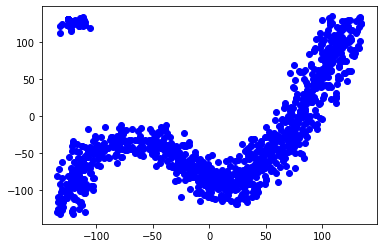

In [115]:
plt.scatter(dataF['lat'], dataF['long'], c ="blue")
plt.show()

In [116]:
# after looking at the dataset scatter plot, it can be observed that the dataset is having outliers
# some data with x < -100 and y > 100 can be detected as OUTLIERS

<AxesSubplot:>

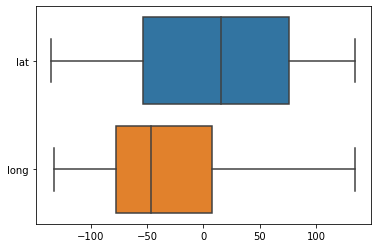

In [117]:
sns.boxplot(data=dataF, orient="h")

<AxesSubplot:>

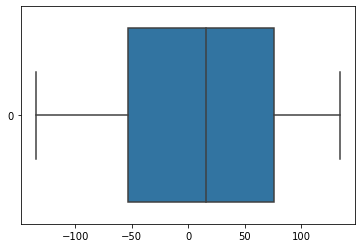

In [118]:
sns.boxplot(data=dataF['lat'], orient="h")

<AxesSubplot:>

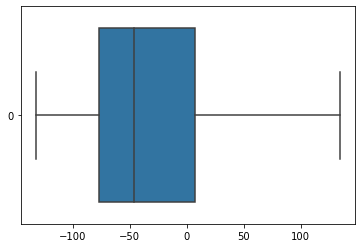

In [119]:
sns.boxplot(data=dataF['long'], orient="h")

In [120]:
# from the observation of boxplot outlier is not detected but 
# there is outlier present in dataset as dipicted by scatter plot

#### Outlier detection and Treatement

In [121]:
def outlier_detection_and_treatment(col):
    sorted(col)
    q1,q3 = np.percentile(col , [25,75])
    IQR = q3-q1
    min_val = q1-(1.5 * IQR)
    max_val = q3+(1.5 * IQR)
    return min_val,max_val

In [122]:
min_val_lat,max_val_lat = outlier_detection_and_treatment(dataF['lat'])
min_val_long,max_val_long = outlier_detection_and_treatment(dataF['long'])

In [123]:
dataF[(dataF['lat'] < min_val_lat) | (dataF['lat'] > max_val_lat)]

,lat,long


In [124]:
dataF[(dataF['long'] < min_val_long) | (dataF['long'] > max_val_long)]

,lat,long


In [125]:
# a look at outlier data after observation from scatter plot
dataF[(dataF['lat'] < -100) & (dataF['long'] > 100)]

,lat,long
1071,-125.366669,131.000000
1072,-114.508654,132.424802
1073,-125.366669,131.000000
1074,-125.366669,131.000000
1075,-126.029114,123.060597
1076,-106.093619,118.532422
1077,-125.366669,131.000000
1078,-116.197531,126.190248
1079,-125.366669,131.000000
1080,-111.529664,133.579278


In [126]:
# dataframe without the outlier data
dataF_without_outlier = dataF.drop(dataF[(dataF['lat'] < -100) & (dataF['long'] > 100)].index)

In [127]:
dataF_without_outlier.head(3)

,lat,long
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932


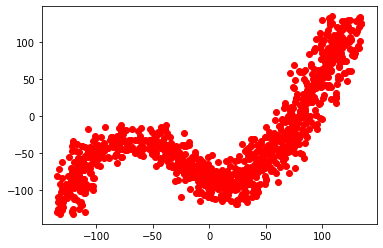

In [128]:
# scatter plot without any outlier data
plt.scatter(dataF_without_outlier['lat'], dataF_without_outlier['long'], c ="red")
plt.show()

In [129]:
# getting correlation values
dataF_without_outlier.corr().style.background_gradient()

,lat,long
lat,1.000000,0.672522
long,0.672522,1.000000


In [130]:
# seperating the dependent variable data from independent data 
X = dataF_without_outlier.iloc[:, :-1].values
y = dataF_without_outlier.iloc[:, 1].values

In [131]:
# splitting the data into train_test for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Linear Regression

In [132]:
# implementing the linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [133]:
reg.intercept_

-39.16782785422419

In [134]:
reg.coef_

array([0.53872541])

In [135]:
# predicting the result
y_pred = reg.predict(X_test)

In [136]:
compare_test_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_test_pred

,Actual,Predicted
0,-78.951450,-41.167577
1,-44.392207,-5.093534
2,-72.945438,-8.681064
3,-78.717102,-41.645524
4,99.544820,24.060326
...,...,...
210,80.264127,15.638757
211,-52.684819,-20.841251
212,-70.000000,-47.446243
213,127.000000,25.820413


In [137]:
# evluation metric is created for comparision
linear_metrics = [metrics.mean_absolute_error(y_test, y_pred),metrics.mean_squared_error(y_test, y_pred),
                  np.sqrt(metrics.mean_squared_error(y_test, y_pred)), metrics.r2_score(y_test, y_pred)]

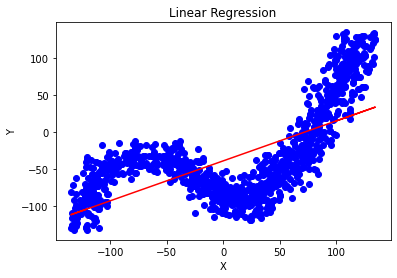

In [138]:
# plotting linear Regression
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, reg.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
 
plt.show()

### Polynomial regression

In [139]:
# here it is tested with different value of degree = 2,3,4,5,6
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

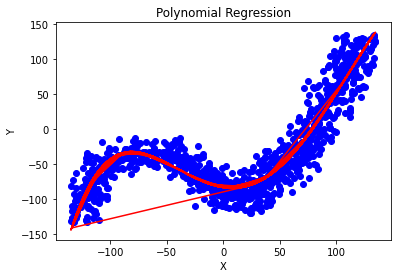

In [140]:
# Plotting the Polynomial Regression
plt.scatter(X, y, color = 'blue')
plt.plot(X, poly_reg.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [141]:
# Prediction of Polynomial Regeression Result
y_poly_pred = poly_reg.predict(poly.fit_transform(X_test))

In [142]:
compare_test_poly_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_poly_pred})
compare_test_poly_pred

,Actual,Predicted
0,-78.951450,-81.983728
1,-44.392207,-32.746957
2,-72.945438,-44.375225
3,-78.717102,-81.671114
4,99.544820,96.123423
...,...,...
210,80.264127,55.530667
211,-52.684819,-72.936501
212,-70.000000,-76.356589
213,127.000000,104.452358


In [143]:
# Evluation metric is created for comparision
poly_metrics = [metrics.mean_absolute_error(y_test, y_poly_pred),metrics.mean_squared_error(y_test, y_poly_pred),
                np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred)), metrics.r2_score(y_test, y_poly_pred)]

In [144]:
compare_test_poly_pred = pd.DataFrame({'linear_regression': linear_metrics, 'polynomial_regression': poly_metrics},
                                     index = ['MAE', 'MSE', 'RMSE', 'R-Square'])

### Differernt Evalution Metrics with the values for both models

In [145]:
compare_test_poly_pred

,linear_regression,polynomial_regression
MAE,42.225921,17.980637
MSE,2581.792256,539.312462
RMSE,50.811340,23.223102
R-Square,0.499248,0.895398


In [146]:
# It is observed that Polynomial regression gives less error and high R-square value
# which shows that Polynomial regression is better than other models..